In [2]:
import pandas as pd
import numpy as np

In [117]:
df=pd.read_csv("/Users/timotheeduverne/Downloads/PatientData3.csv", sep=";")

In [118]:
df.head()

,PatientID,Medication,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,DueDate,AmountPaid,Sex,PurchasedBy,Pharmacy
0,1001,Medication1,340,A,IN,30.0,30.0,59,R,30/01/2012,29/02/2012,7.0,M,Patient,PHARMACY 1
1,1001,Medication1,340,A,IN,30.0,30.0,59,R,20/03/2012,19/04/2012,7.0,M,Patient,PHARMACY 1
2,1001,Medication1,340,A,IN,30.0,30.0,59,R,11/05/2012,10/06/2012,7.0,M,Patient,PHARMACY 1
3,1001,Medication1,340,A,IN,30.0,30.0,59,R,24/06/2012,24/07/2012,7.0,M,Patient,PHARMACY 1
4,1001,Medication1,340,A,IN,30.0,30.0,59,R,31/07/2012,30/08/2012,7.0,M,Patient,PHARMACY 1


# Creating the Target Column

Our end goal is to predict whether any given patient will "adhere" or not i.e. follow his treatment, so that big pharma can make more money, and patients can be treated more effectively

In order to achieve that, we decided to first merge "PatientID" and "Medication". Now every "UID" has at least one data point.

In [5]:
df.dtypes

PatientID              int64
Medication            object
ActGPI                 int64
RouteOfAdmin          object
State                 object
QTY                  float64
For_How_Many_Days    float64
Age                    int64
MailRetail            object
Date                  object
DueDate               object
AmountPaid           float64
Sex                   object
PurchasedBy           object
Pharmacy              object
dtype: object

In [119]:
df['UID']=df.PatientID.map(str)+' '+df.Medication

In [120]:
df2 = df.drop(columns=['PatientID','Medication'], axis=1)
df2.head()

,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,DueDate,AmountPaid,Sex,PurchasedBy,Pharmacy,UID
0,340,A,IN,30.0,30.0,59,R,30/01/2012,29/02/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1
1,340,A,IN,30.0,30.0,59,R,20/03/2012,19/04/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1
2,340,A,IN,30.0,30.0,59,R,11/05/2012,10/06/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1
3,340,A,IN,30.0,30.0,59,R,24/06/2012,24/07/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1
4,340,A,IN,30.0,30.0,59,R,31/07/2012,30/08/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1


# Formatting Dates 

We first needed to create the "theoretical" date at which the UID should have re-purchased his medication

In [121]:
df2.Date = pd.to_datetime(df2.Date, format="%d/%m/%Y")

In [122]:
from datetime import timedelta

temp = df2['For_How_Many_Days'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

df2['theoretical_PD']=df2.Date + temp

# Long and Painful Data Preparation
(buckle up)

In [11]:
lst=[]
for i,g in df.groupby('UID'):
    if g.shape[1]==1:
        lst.append(np.nan)
    for q,w in enumerate(g.iloc[:-1,0]):
        lst.append((g.iloc[q+1,7]-g.iloc[q,14]).days)
    lst.append(np.nan)

In [123]:
df2['lag']=lst

In [124]:
df2.head()

,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,DueDate,AmountPaid,Sex,PurchasedBy,Pharmacy,UID,theoretical_PD,lag
0,340,A,IN,30.0,30.0,59,R,2012-01-30,29/02/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-02-29,20.0
1,340,A,IN,30.0,30.0,59,R,2012-03-20,19/04/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-04-19,22.0
2,340,A,IN,30.0,30.0,59,R,2012-05-11,10/06/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-06-10,14.0
3,340,A,IN,30.0,30.0,59,R,2012-06-24,24/07/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-07-24,7.0
4,340,A,IN,30.0,30.0,59,R,2012-07-31,30/08/2012,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-08-30,8.0


In [125]:
df2.drop(columns="DueDate", axis=1, inplace=True)
df2.head()

,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,AmountPaid,Sex,PurchasedBy,Pharmacy,UID,theoretical_PD,lag
0,340,A,IN,30.0,30.0,59,R,2012-01-30,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-02-29,20.0
1,340,A,IN,30.0,30.0,59,R,2012-03-20,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-04-19,22.0
2,340,A,IN,30.0,30.0,59,R,2012-05-11,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-06-10,14.0
3,340,A,IN,30.0,30.0,59,R,2012-06-24,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-07-24,7.0
4,340,A,IN,30.0,30.0,59,R,2012-07-31,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-08-30,8.0


Now that we have our value, we must determine our threshold for adherence in order to create our categoricale (boolean) variable. But first, let's clean up the data by dropping outliers.

# Nan and Outlier Detection

In [126]:
len(df) - df2.count()

ActGPI                 0
RouteOfAdmin           0
State                  0
QTY                    0
For_How_Many_Days      0
Age                    0
MailRetail             0
Date                   0
AmountPaid             0
Sex                    0
PurchasedBy            0
Pharmacy               0
UID                    0
theoretical_PD         0
lag                  950
dtype: int64

Nan values are all in the "lag" column. Therefore we can simply use the dropna function.

In [127]:
df_na=df2.dropna()
df_na.head()

,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,AmountPaid,Sex,PurchasedBy,Pharmacy,UID,theoretical_PD,lag
0,340,A,IN,30.0,30.0,59,R,2012-01-30,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-02-29,20.0
1,340,A,IN,30.0,30.0,59,R,2012-03-20,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-04-19,22.0
2,340,A,IN,30.0,30.0,59,R,2012-05-11,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-06-10,14.0
3,340,A,IN,30.0,30.0,59,R,2012-06-24,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-07-24,7.0
4,340,A,IN,30.0,30.0,59,R,2012-07-31,7.0,M,Patient,PHARMACY 1,1001 Medication1,2012-08-30,8.0


Now Outliers

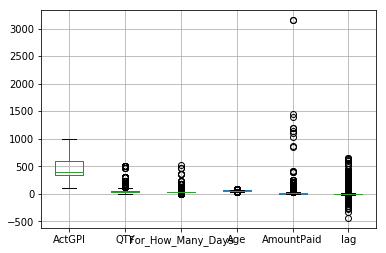

In [18]:
df_na.boxplot()

We should at least get rid of the main outlier(s) here i.e. with "AmountPaid" > 3.000

In [19]:
df_clean=df_na[df_na['AmountPaid']<3000]

# Setting a Threshold for "lag" and Creating the Categorical Variable

In order to determine the threshold, I decided to calculate the mean per UID (Patient&Medication) and then, most probably set the cut at the 66.67th (2/3) percentile.

My assumption here is that for one given patient, adherence can be different for two different medications.

In [20]:
lag_threshold = df_clean.groupby('UID').agg(np.mean).quantile(2/3)[-1]

In [21]:
df_grouped = df_clean.groupby('UID').agg(np.mean)

In [22]:
df_grouped.lag.describe()

count    761.000000
mean      23.028104
std       70.498311
min     -438.000000
25%        0.210526
50%        4.300000
75%       21.000000
max      623.000000
Name: lag, dtype: float64

In [23]:
df_grouped['adherence'] = np.where(df_grouped['lag']>lag_threshold,1,0)

In [24]:
df_grouped.head()

,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag,adherence
UID,,,,,,,
1001 Medication1,340,30.0,30.0,59,7.0,14.421053,0
1001 Medication10,281,30.0,30.0,59,4.0,32.000000,1
1001 Medication11,361,30.0,30.0,59,4.0,15.428571,1
1001 Medication12,361,30.0,30.0,59,4.0,12.181818,0
1001 Medication13,659,90.0,30.0,59,20.0,0.074074,0


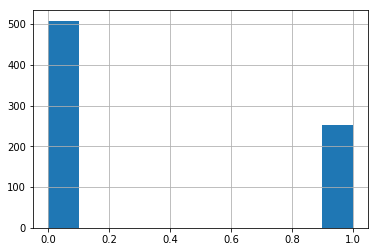

In [25]:
df_grouped.adherence.hist()

Approximately 1/3 Vs. 2/3 ...or actually, pretty precisely, since this is the rigorous meaning of the threshold that we picked! We can work with this data. But before we go further, let's check if the data can already tell us something:

In [26]:
df_grouped.groupby('adherence').mean()

,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag
adherence,,,,,,
0,487.702756,43.212534,38.389278,58.175197,12.924935,-2.863013
1,501.885375,46.390279,24.994506,57.245059,23.889544,75.015010


Beyond the obvious lag difference, we see that the average amount paid (per medication and per purchase) is higher (almost double) for patients who don't adhere. And their purchases cover a shorter period of time.

# Now to Modelling :-)

We want a logistic regression.

# Logistic Regression

Logistic Regression Assumptions:
Binary logistic regression requires the dependent variable to be binary. -->ok
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome. -->ok (non-adherence is 1 and that's what we're looking for)
Only the meaningful variables should be included. --> The dataframe we are now working with is a PCA of ONLY the numeric variables. Therefore, it might be useful to include some of the data that we filtered out previously (RouteOfAdmin, State, MailRetail, Sex, PurchasedBy, Pharmacy)
The independent variables should be independent of each other. That is, the model should have little or no multicollinearity. --> We should check this.
The independent variables are linearly related to the log odds. --> Say whaaat?!!
Logistic regression requires quite large sample sizes. --> ok

Since we're in a bit of a rush, let's start by doing as we initially planned and directly build this logistic regression.

# First Imperfect Attempt (From Full Grouped Set)

We should split our dataset into a train and a test set (80%/20%), and define our target and variables

In [36]:
from sklearn.model_selection import train_test_split

adh = df_grouped['adherence']
other_variables = df_grouped.loc[:, ~df_grouped.columns.isin(['lag','adherence'])]
X_train, X_test, y_train, y_test = train_test_split(other_variables, adh, test_size=0.2)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)

(153, 5)
(608,)
(153,)
(608, 5)


Now the real logistic regression model

In [38]:
import statsmodels.api as sm
l_model=sm.Logit(y_train,X_train).fit()
print(l_model.summary2())

Optimization terminated successfully.
         Current function value: 0.569580
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: adherence        AIC:              702.6092  
Date:               2019-07-03 17:40 BIC:              724.6601  
No. Observations:   608              Log-Likelihood:   -346.30   
Df Model:           4                LL-Null:          -388.60   
Df Residuals:       603              LLR p-value:      1.8565e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
ActGPI             0.0012   0.0005  2.4860 0.0129  0.0003  0.0021
QTY                0.0000   0.0022  0.0154 0.9877 -0.0043  0.0043


In [44]:
y_pred = np.where(l_model.predict(X_test)<0.5,0,1)

It seems like "QTY" and "AmountPaid" are not relevant variables but let's see how this works with our test set.

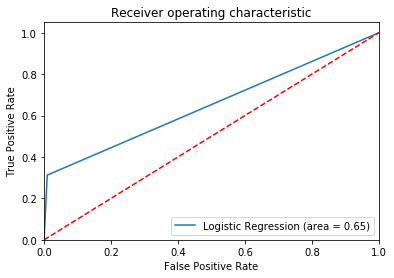

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

I was having some trouble with the statsmodel version of the logistic regression, so I switched to SciKit

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log2 = LogisticRegression()
log2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred2 = log2.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

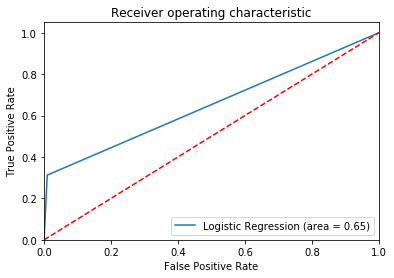

In [48]:
logit_roc_auc = roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Same results (meaning the default threshold of the SciKit log.reg. is 0.5)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[104   1]
 [ 33  15]]


Now let's try without the 2 useless columns

In [51]:
adh = df_grouped['adherence']
other_variables = df_grouped.loc[:, ~df_grouped.columns.isin(['QTY','AmountPaid','lag','adherence'])]
X_train, X_test, y_train, y_test = train_test_split(other_variables, adh, test_size=0.2)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)

(153, 3)
(608,)
(153,)
(608, 3)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


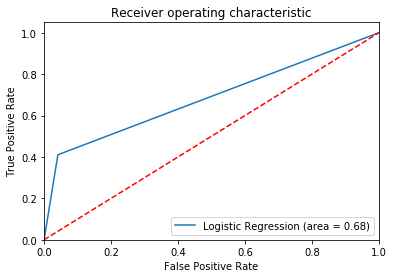

In [52]:
log3 = LogisticRegression()
log3.fit(X_train, y_train)

y_pred_red = log3.predict(X_test)

logit_roc_auc = roc_auc_score(y_test, y_pred_red)
rf_roc_auc = roc_auc_score(y_test, y_pred_red)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_red)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

This model is better but still not great. Let's try Random Forest

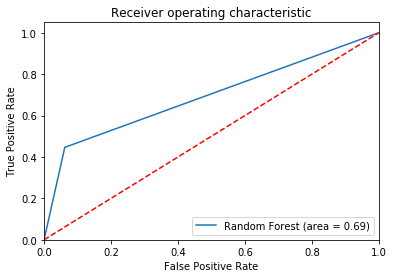

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)

#print(confusion_matrix(y_test, y_pred_rf))

logit_roc_auc = roc_auc_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

This model is slightly better than the previous one but still far from perfect (area under curve is only 0.64). Still, it will allow the company to better target potential "non-adherent" patients and monitor them more closely.

Combining both weeks' projects, let's try unsupervized learning (clustering) on the full dataset. This will allow me to generate labels (depending on clusters) which MIGHT better the supervized ML model.

# Unsupervized ML

Let's do a bit of unsupervized learning on the complete dataset in order to create clusters. From these clusters, we will assign a label to each row and turn it into dummies. From this new dataset, we will see if supervized learning models are more accurate.

In [113]:
df_unsuper = df_grouped.loc[:, ~df_grouped.columns.isin(['adherence'])]
df_unsuper.head()

,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag
UID,,,,,,
1001 Medication1,340,30.0,30.0,59,7.0,14.421053
1001 Medication10,281,30.0,30.0,59,4.0,32.000000
1001 Medication11,361,30.0,30.0,59,4.0,15.428571
1001 Medication12,361,30.0,30.0,59,4.0,12.181818
1001 Medication13,659,90.0,30.0,59,20.0,0.074074


The grouped dataframe only contains numerical columns. Let's join it with df_clean on "UID".
The difficulty is that UIDs are unique in the grouped dataframe but not in df_clean.
Let's check whether every UID has unique values for each column (except dates) in the ungrouped df

Let's define the non-numeric columns we are interested in. This will allow us to loop through the ungrouped df and check which of these columns do not have unique values for a given UID.

In [103]:
g.columns[[(i not in g._get_numeric_data().columns)& (i not in ['theoretical_PD','Date']) for i in g.columns]]

Index(['RouteOfAdmin', 'State', 'MailRetail', 'Sex', 'PurchasedBy', 'Pharmacy',
       'UID'],
      dtype='object')

In [142]:
pharma_changers = []
for i,g in df_clean.groupby('UID'):
    for j in g.columns[[(i not in g._get_numeric_data().columns)& (i not in ['theoretical_PD','Date']) for i in g.columns]]:
        if g[j].nunique()>1:
            pharma_changers.append((str(i),j))
            print(i,j)

1003 Medication28 Pharmacy
1003 Medication29 Pharmacy
1003 Medication30 Pharmacy
1003 Medication33 Pharmacy
1003 Medication35 Pharmacy
1003 Medication36 Pharmacy
1003 Medication37 Pharmacy
1008 Medication101 Pharmacy
1008 Medication103 Pharmacy
1008 Medication18 Pharmacy
1008 Medication36 Pharmacy
1008 Medication74 Pharmacy
1008 Medication95 Pharmacy
1008 Medication98 Pharmacy
1011 Medication125 Pharmacy
1011 Medication127 Pharmacy
1011 Medication128 Pharmacy
1011 Medication129 Pharmacy
1011 Medication130 Pharmacy
1011 Medication131 Pharmacy
1012 Medication135 Pharmacy
1012 Medication138 Pharmacy
1012 Medication139 Pharmacy
1012 Medication141 Pharmacy
1012 Medication142 Pharmacy
1012 Medication143 Pharmacy
1012 Medication145 Pharmacy
1012 Medication147 Pharmacy
1012 Medication148 Pharmacy
1012 Medication152 Pharmacy
1012 Medication153 Pharmacy
1012 Medication19 Pharmacy
1012 Medication20 Pharmacy
1012 Medication33 Pharmacy
1012 Medication95 Pharmacy
1013 Medication157 Pharmacy
1013 Med

#### Except for 1 patient (who seems to be quite the "foufou"), all the columns (except "Pharmacy") have unique values, so they can be joined to the grouped df without loss of information.

Instead of keeping the "Pharmacy" column, I decided to create a dummy column which will indicate whether the UID was always bought from the same pharmacy (0) or not (1)

In [130]:
df[(df['UID']=='1050 Medication368')|(df['UID']=='1050 Medication419')]

,PatientID,Medication,ActGPI,RouteOfAdmin,State,QTY,For_How_Many_Days,Age,MailRetail,Date,DueDate,AmountPaid,Sex,PurchasedBy,Pharmacy,UID
7622,1050,Medication368,312,A,AL,28.0,60.0,63,R,04/04/2012,03/06/2012,5.0,F,Patient,PHARMACY 35,1050 Medication368
7623,1050,Medication368,312,A,AL,90.0,90.0,63,M,17/05/2012,15/08/2012,10.0,F,Patient,PHARMACY 36,1050 Medication368
7624,1050,Medication368,312,A,AL,90.0,90.0,63,M,16/08/2012,14/11/2012,10.0,F,Patient,PHARMACY 36,1050 Medication368
7625,1050,Medication368,312,A,AL,90.0,90.0,63,M,24/11/2012,22/02/2013,10.0,F,Patient,PHARMACY 36,1050 Medication368
7626,1050,Medication368,312,A,AL,90.0,90.0,63,M,22/02/2013,23/05/2013,10.0,F,Patient,PHARMACY 36,1050 Medication368
7627,1050,Medication368,312,A,AL,90.0,90.0,63,M,01/05/2013,30/07/2013,10.0,F,Patient,PHARMACY 36,1050 Medication368
7628,1050,Medication368,312,A,AL,90.0,90.0,63,M,31/08/2013,29/11/2013,10.0,F,Patient,PHARMACY 36,1050 Medication368
7629,1050,Medication368,312,A,AL,90.0,90.0,63,M,26/11/2013,24/02/2014,10.0,F,Patient,PHARMACY 36,1050 Medication368
7642,1050,Medication419,340,A,AL,30.0,60.0,63,R,30/03/2013,29/05/2013,2.5,F,Patient,PHARMACY 35,1050 Medication419
7643,1050,Medication419,340,A,AL,90.0,180.0,63,M,26/04/2013,23/10/2013,5.0,F,Patient,PHARMACY 36,1050 Medication419


The "foufou" just bought the 2 medications in retail the first time, then switched to mail order. It can't have a huge influence on our modelling, but he should be classified as "M"

So, let's create the dummy "phrmcy_chg" column

In [149]:
df_unsuper['phrmcy_chg'] = np.where(df_unsuper['UID'].isin(pd.DataFrame(pharma_changers)[0]), 1,0)
df_unsuper.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UID,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag,phrmcy_chg
0,1001 Medication1,340,30.0,30.0,59,7.0,14.421053,0
1,1001 Medication10,281,30.0,30.0,59,4.0,32.000000,0
2,1001 Medication11,361,30.0,30.0,59,4.0,15.428571,0
3,1001 Medication12,361,30.0,30.0,59,4.0,12.181818,0
4,1001 Medication13,659,90.0,30.0,59,20.0,0.074074,0


Now, let's add our columns. Before we join (add the columns), we must drop the duplicates in the second df. We will use the keep:'last' argument because of the "foufou".

In [174]:
df_join = df[['RouteOfAdmin', 'State', 'MailRetail', 'Sex', 'PurchasedBy', 'UID']]
df_join.drop_duplicates(inplace=True,keep='last')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [175]:
df_join[(df['UID']=='1050 Medication368')|(df['UID']=='1050 Medication419')]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,RouteOfAdmin,State,MailRetail,Sex,PurchasedBy,UID
7622,A,AL,R,F,Patient,1050 Medication368
7629,A,AL,M,F,Patient,1050 Medication368
7642,A,AL,R,F,Patient,1050 Medication419
7645,A,AL,M,F,Patient,1050 Medication419


Actually, since the rows were not entirely identical, we are left with 2 rows for each of these UIDs. So let's filter out the 2 unwanted rows

In [176]:
df_join=df_join[~df_join.index.isin([7622,7642])]

Now the join should work seemlessly

In [177]:
df_unsuper.shape

(761, 8)

In [178]:
df_join.shape

(952, 6)

I spent some time trying to understand this apparent mismatch. It turns out this is due to the rows dropped (via dropna) that represented UIDs with single entries. It's ok since these are totally irrelevant for our purpose.

In [185]:
df_join.dtypes

RouteOfAdmin    object
State           object
MailRetail      object
Sex             object
PurchasedBy     object
UID             object
dtype: object

In [184]:
df_unsuper.dtypes

UID                   object
ActGPI                 int64
QTY                  float64
For_How_Many_Days    float64
Age                    int64
AmountPaid           float64
lag                  float64
phrmcy_chg             int64
dtype: object

In [187]:
df_unsuper2 = df_unsuper.merge(df_join, how='left', on='UID')
df_unsuper2.head()

,UID,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag,phrmcy_chg,RouteOfAdmin,State,MailRetail,Sex,PurchasedBy
0,1001 Medication1,340,30.0,30.0,59,7.0,14.421053,0,A,IN,R,M,Patient
1,1001 Medication10,281,30.0,30.0,59,4.0,32.000000,0,A,IN,R,M,Patient
2,1001 Medication11,361,30.0,30.0,59,4.0,15.428571,0,A,IN,R,M,Patient
3,1001 Medication12,361,30.0,30.0,59,4.0,12.181818,0,A,IN,R,M,Patient
4,1001 Medication13,659,90.0,30.0,59,20.0,0.074074,0,A,IN,R,M,Patient


In [293]:
df_unsuper2.UID.nunique()

761

# Dummies

Let's check our data before we start creating dummies

In [196]:
df_unsuper2.RouteOfAdmin.value_counts()

A    678
B     17
G     16
D      9
H      8
I      8
C      7
F      6
E      5
O      2
L      2
K      2
J      2
M      1
Name: RouteOfAdmin, dtype: int64

This column is too overweighted by value "A" so I decided to drop it.

In [197]:
df_unsuper2.drop(columns=['RouteOfAdmin'], axis=1, inplace=True)

In [195]:
df_unsuper2.PurchasedBy = df_unsuper2.PurchasedBy.str.replace('SPOUSE','Spouse')
df_unsuper2.PurchasedBy.value_counts()

Patient    383
Spouse     380
Name: PurchasedBy, dtype: int64

In [200]:
df_unsuper2.Sex.value_counts()

F    414
M    349
Name: Sex, dtype: int64

Now that the columns are clean, let's turn them to dummies

In [202]:
df_dummies=pd.get_dummies(data=df_unsuper2, columns=['State','MailRetail','Sex','PurchasedBy'], drop_first=True)
df_dummies.head()

,UID,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,lag,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse
0,1001 Medication1,340,30.0,30.0,59,7.0,14.421053,0,1,1,1,0
1,1001 Medication10,281,30.0,30.0,59,4.0,32.000000,0,1,1,1,0
2,1001 Medication11,361,30.0,30.0,59,4.0,15.428571,0,1,1,1,0
3,1001 Medication12,361,30.0,30.0,59,4.0,12.181818,0,1,1,1,0
4,1001 Medication13,659,90.0,30.0,59,20.0,0.074074,0,1,1,1,0


# Now To Clustering

First, let's determine the optimal number of clusters

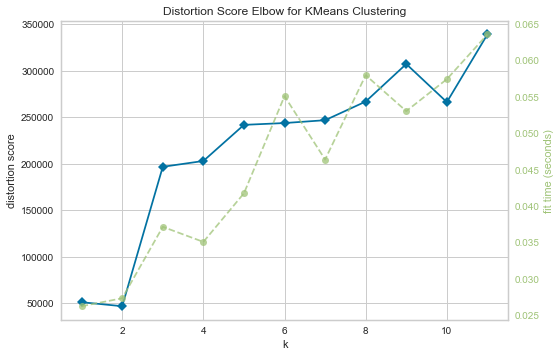

In [213]:
from sklearn import cluster
from yellowbrick.cluster import KElbowVisualizer
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_dummies.iloc[:, 1:-1])
visualizer.poof()

The best number of clusters seems to be 2

In [218]:
X = df_dummies.iloc[:, 1:-1]
model = cluster.KMeans(2)
model.fit(X)
y_pred = model.predict(X)
print(y_pred)

[1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 

However this clustering is not great. Let's try it with PCA.

# PCA

Let's try a PCA first, in order to simplify it.

In [219]:
from sklearn.decomposition import PCA

In [224]:
df_pca = df_dummies.drop(columns=['lag'], axis=1)
df_pca.set_index('UID',inplace=True)
df_pca.head()

,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse
UID,,,,,,,,,,
1001 Medication1,340,30.0,30.0,59,7.0,0,1,1,1,0
1001 Medication10,281,30.0,30.0,59,4.0,0,1,1,1,0
1001 Medication11,361,30.0,30.0,59,4.0,0,1,1,1,0
1001 Medication12,361,30.0,30.0,59,4.0,0,1,1,1,0
1001 Medication13,659,90.0,30.0,59,20.0,0,1,1,1,0


In [268]:
(df_pca.ActGPI/10).astype(int).value_counts()

39    73
36    69
58    58
65    53
27    39
33    36
28    35
49    35
72    32
37    26
34    21
44    20
75    20
66    20
57    16
50    11
40    11
90    11
22    10
73     9
42     9
60     8
94     8
79     8
12     7
61     7
82     7
97     6
43     6
59     6
21     6
30     5
24     5
41     5
99     5
11     5
86     5
88     5
62     5
85     4
25     3
31     3
52     3
67     3
16     3
68     2
54     2
83     2
13     2
89     2
23     2
32     2
19     1
46     1
77     1
35     1
64     1
56     1
81     1
Name: ActGPI, dtype: int64

We should standardize our data first

In [241]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

stdz_columns_list = [df_pca['ActGPI'],df_pca['QTY'],df_pca['For_How_Many_Days'],df_pca['Age'],df_pca['AmountPaid']]

stdz = pd.DataFrame()
for column in stdz_columns_list:
    stdz[column.name]=[i[0] for i in min_max_scaler.fit_transform(column.values.reshape(-1,1))]
        
stdz.head()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid
0,0.256818,0.059059,0.055133,0.545455,0.004920
1,0.189773,0.059059,0.055133,0.545455,0.002811
2,0.280682,0.059059,0.055133,0.545455,0.002811
3,0.280682,0.059059,0.055133,0.545455,0.002811
4,0.619318,0.179179,0.055133,0.545455,0.014057


In [247]:
print(stdz.shape)
print(df_pca.shape)

(763, 5)
(763, 10)


,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse
UID,,,,,
1001 Medication1,0,1,1,1,0
1001 Medication10,0,1,1,1,0
1001 Medication11,0,1,1,1,0
1001 Medication12,0,1,1,1,0
1001 Medication13,0,1,1,1,0


In [249]:
stdz.set_index(df_pca.index, drop=True, inplace=True)
stdz.head()

,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid
UID,,,,,
1001 Medication1,0.256818,0.059059,0.055133,0.545455,0.004920
1001 Medication10,0.189773,0.059059,0.055133,0.545455,0.002811
1001 Medication11,0.280682,0.059059,0.055133,0.545455,0.002811
1001 Medication12,0.280682,0.059059,0.055133,0.545455,0.002811
1001 Medication13,0.619318,0.179179,0.055133,0.545455,0.014057


In [250]:
stdz = df_pca[['phrmcy_chg','State_IN','MailRetail_R','Sex_M','PurchasedBy_Spouse']].merge(stdz, how='inner', left_index=True, right_index=True)
stdz.head()

,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,ActGPI,QTY,For_How_Many_Days,Age,AmountPaid
UID,,,,,,,,,,
1001 Medication1,0,1,1,1,0,0.256818,0.059059,0.055133,0.545455,0.004920
1001 Medication10,0,1,1,1,0,0.189773,0.059059,0.055133,0.545455,0.002811
1001 Medication11,0,1,1,1,0,0.280682,0.059059,0.055133,0.545455,0.002811
1001 Medication12,0,1,1,1,0,0.280682,0.059059,0.055133,0.545455,0.002811
1001 Medication13,0,1,1,1,0,0.619318,0.179179,0.055133,0.545455,0.014057


In [258]:
print(stdz.shape)
stdz1=stdz.copy()
stdz1=stdz1.drop_duplicates()
stdz1.shape

(767, 10)


(704, 10)

Even though there appears to be duplicate rows, there are none. They are just the result of two different UIDs having the same parameters

The ActGPI column is useless because we cannot figure out what it represents exactly. Supposedly, it contains information about the type of medication, but we could not manage to understand it thoroughly. Therefore I decided to drop it

In [ ]:
stdz.drop(columns=['ActGPI'], axis=1, inplace=True)

In [271]:
stdz.head()

,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid
UID,,,,,,,,,
1001 Medication1,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920
1001 Medication10,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811
1001 Medication11,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811
1001 Medication12,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811
1001 Medication13,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057


In [276]:
pca = PCA(5)

pc = pca.fit_transform(stdz)
ppc = pd.DataFrame(data=pc, columns=['pc1','pc2','pc3','pc4','pc5'])
ppc.head()

,pc1,pc2,pc3,pc4,pc5
0,0.768945,-0.470214,-0.005429,0.003132,0.037664
1,0.768949,-0.470235,-0.005455,0.003157,0.037663
2,0.768949,-0.470235,-0.005455,0.003157,0.037663
3,0.768949,-0.470235,-0.005455,0.003157,0.037663
4,0.769414,-0.472553,-0.006322,0.004290,0.035302


In [277]:
pca.explained_variance_ratio_

array([0.4062851 , 0.28606421, 0.13957771, 0.11658172, 0.02766811])

This PCA works well with 2 dimensions.

In [278]:
pca = PCA(2)

pc = pca.fit_transform(stdz)
ppc = pd.DataFrame(data=pc, columns=['pc1','pc2'])
ppc.head()

,pc1,pc2
0,0.768945,-0.470214
1,0.768949,-0.470235
2,0.768949,-0.470235
3,0.768949,-0.470235
4,0.769414,-0.472553


In [279]:
pca.explained_variance_ratio_

array([0.4062851 , 0.28606421])

# Now To Clustering (again)

First, let's determine the optimal number of clusters

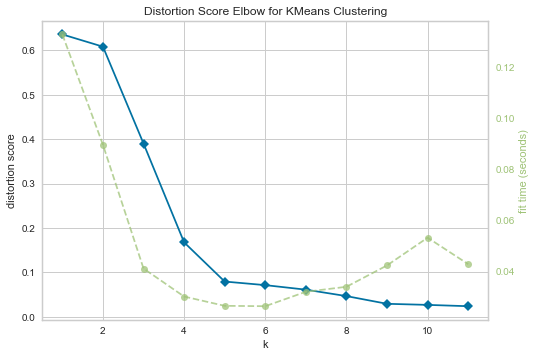

In [280]:
from sklearn import cluster
from yellowbrick.cluster import KElbowVisualizer
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(ppc)
visualizer.poof()

The optimal number of clusters seems to be 5 or 6. Let's zoom in to check.

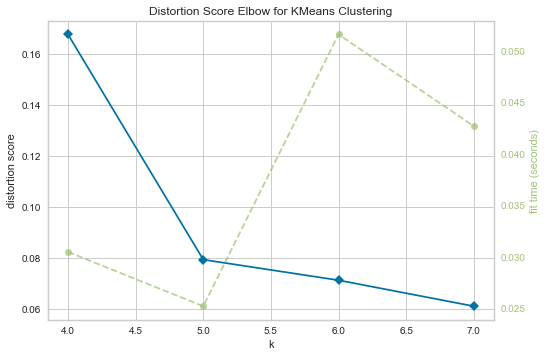

In [282]:
visualizer = KElbowVisualizer(model, k=(4,8))
visualizer.fit(ppc)
visualizer.poof()

No debate, optimum is 5

In [283]:
model = cluster.KMeans(5)
model.fit(ppc)
y_pred = model.predict(ppc)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 0 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 2 2 2 

Now, we have our additional labels from unsupervized learning. Let's add them to our supervized learning df and see whether this improves our ability to predict adherence.

In [284]:
print(stdz.shape)
print(y_pred.shape)

(767, 9)
(767,)


In [285]:
stdz['cluster'] = y_pred

In [287]:
stdz_dum = pd.get_dummies(data=stdz, columns=['cluster'], drop_first=True)
stdz_dum.head()

,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid,cluster_1,cluster_2,cluster_3,cluster_4
UID,,,,,,,,,,,,,
1001 Medication1,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920,0,0,0,0
1001 Medication10,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0
1001 Medication11,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0
1001 Medication12,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0
1001 Medication13,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057,0,0,0,0


# Second Supervized ML Attempt (with cluster info)
We should split our dataset into a train and a test set (80%/20%), and define our target and variables. But first, let's bring our "adherence" column back into our stdz dataframe.

,UID,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid,cluster,adherence
0,1001 Medication1,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920,0,0
1,1001 Medication10,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,1
2,1001 Medication11,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,1
3,1001 Medication12,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0
4,1001 Medication13,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057,0,0


In [335]:
stdz_dum = stdz_dum.reset_index()
df_ultimate = stdz_dum.merge(df_grouped['adherence'] , how='inner', on='UID')
df_ultimate.head()

,index,UID,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid,cluster_1,cluster_2,cluster_3,cluster_4,adherence
0,0,1001 Medication1,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920,0,0,0,0,0
1,1,1001 Medication10,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,1
2,2,1001 Medication11,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,1
3,3,1001 Medication12,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,0
4,4,1001 Medication13,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057,0,0,0,0,0


In [336]:
df_ultimate.set_index('UID',inplace=True)

In [337]:
adh2 = df_ultimate['adherence']
other_variables2 = df_ultimate.loc[:, ~df_ultimate.columns.isin(['adherence'])]
X_train2, X_test2, y_train2, y_test2 = train_test_split(other_variables2, adh2, test_size=0.2)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)
print(X_train2.shape)

(154, 14)
(613,)
(154,)
(613, 14)


In [338]:
l_model=sm.Logit(y_train2,X_train2).fit()
print(l_model.summary2())

Optimization terminated successfully.
         Current function value: 0.545190
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.141     
Dependent Variable:   adherence         AIC:               696.4032  
Date:                 2019-07-05 18:40  BIC:               758.2604  
No. Observations:     613               Log-Likelihood:    -334.20   
Df Model:             13                LL-Null:           -389.25   
Df Residuals:         599               LLR p-value:       1.7844e-17
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
index               -0.0003   0.0006 -0.5191 0.6037  -0.0014   0.0008
phrmcy_chg      

Many variables bring nothing to the model. We will get rid of them later ...if we get the chance to do so!

In [339]:
log2 = LogisticRegression()
log2.fit(X_train2, y_train2)

y_pred2 = log2.predict(X_test2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


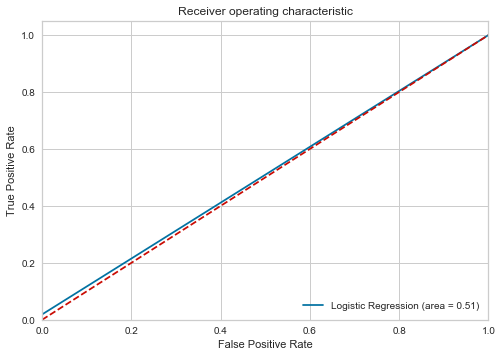

In [368]:
logit_roc_auc = roc_auc_score(y_test2, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# LOL (not)

In [341]:
confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [342]:
df_ultimate.head()

,index,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid,cluster_1,cluster_2,cluster_3,cluster_4,adherence
UID,,,,,,,,,,,,,,,
1001 Medication1,0,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920,0,0,0,0,0
1001 Medication10,1,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,1
1001 Medication11,2,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,1
1001 Medication12,3,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0,0,0,0
1001 Medication13,4,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057,0,0,0,0,0


Now let's try without the useless columns

In [366]:
adh3 = df_ultimate['adherence']
other_variables3 = df_ultimate.loc[:, ~df_ultimate.columns.isin(['index','cluster_4','MailRetail_R','Age','phrmcy_chg','State_IN','QTY','AmountPaid','adherence'])]
X_train3, X_test3, y_train3, y_test3 = train_test_split(other_variables3, adh3, test_size=0.2)

In [367]:
l_model=sm.Logit(y_train3,X_train3).fit()
print(l_model.summary2())

Optimization terminated successfully.
         Current function value: 0.536287
         Iterations 8
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.157     
Dependent Variable:   adherence         AIC:               669.4882  
Date:                 2019-07-05 18:44  BIC:               695.9984  
No. Observations:     613               Log-Likelihood:    -328.74   
Df Model:             5                 LL-Null:           -389.95   
Df Residuals:         607               LLR p-value:       9.6614e-25
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
Sex_M                1.9519   0.3756  5.1968 0.0000   1.2158   2.6881
PurchasedBy_Spou

In [325]:
stdz = stdz.reset_index()
df_ultimate = stdz.merge(df_grouped['adherence'] , how='inner', on='UID')
df_ultimate.head()

,level_0,index,UID,phrmcy_chg,State_IN,MailRetail_R,Sex_M,PurchasedBy_Spouse,QTY,For_How_Many_Days,Age,AmountPaid,cluster,adherence
0,0,0,1001 Medication1,0,1,1,1,0,0.059059,0.055133,0.545455,0.004920,0,0
1,1,1,1001 Medication10,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,1
2,2,2,1001 Medication11,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,1
3,3,3,1001 Medication12,0,1,1,1,0,0.059059,0.055133,0.545455,0.002811,0,0
4,4,4,1001 Medication13,0,1,1,1,0,0.179179,0.055133,0.545455,0.014057,0,0


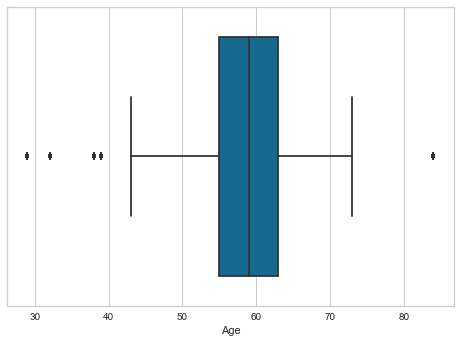

In [363]:
import seaborn as sns
sns.boxplot(df.Age)